In [3]:
# --------- importing libraries ----------
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Aer (runs on local device)
# Aer provides 'high-performance quantum computing simulators with realistic noise models'
from qiskit import Aer

# IBMQ: real devices, via IBMQ Account
from qiskit import IBMQ

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
# ---------- ZZ Stabilizer measurement ----------

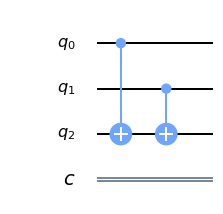

In [62]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3,1)
circ.cx(0, 2)
# circ.x(1)  # bit-flip error for the syndrome (q_2) to detect
circ.cx(1, 2)
circ.draw()

In [63]:
# --- statevector backend ----
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


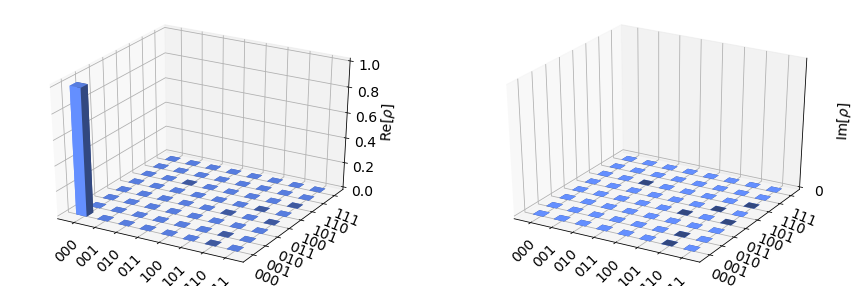

In [64]:
plot_state_city(outputstate)

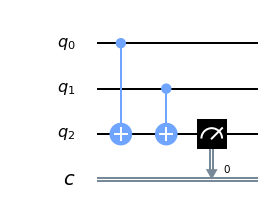

In [65]:
# ---- Aer: qasm_simulator ----
circ.measure(2,0)
circ.draw()

In [66]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'0': 1024}


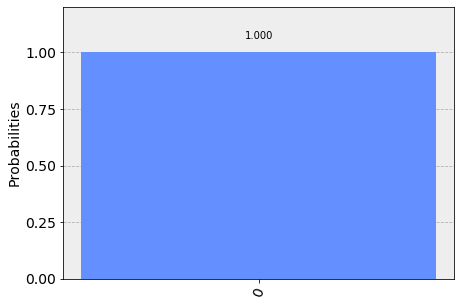

In [67]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
# the statevector formalism predicts 'no error'
# for a logical qubit prepared as |00>

# a bit flip gate (X) on any of the three qubits would introduce an error and a result 
# of 100% |1> measurement

In [24]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [25]:
backend = provider.get_backend('ibmqx2')

In [26]:
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [29]:
result_exp = job_exp.result()

counts_exp:  {'1': 34, '0': 990}


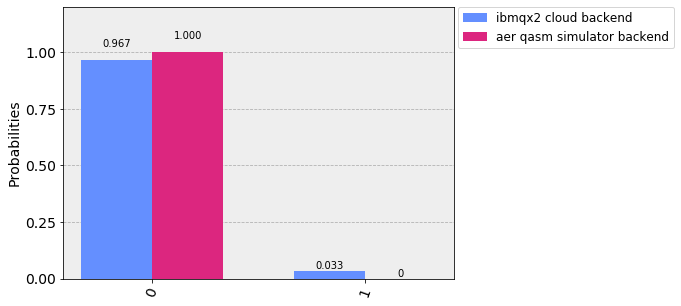

In [30]:
counts_exp = result_exp.get_counts(circ)
print("counts_exp: ", counts_exp)
plot_histogram([counts_exp,counts], legend=['ibmqx2 cloud backend',
                                            'aer qasm simulator backend'])

In [31]:
# It can be seen that even for this simple circuit, errors occur on the real device.
# Apparently, in it's standard setting, the aer qasm simulator does not implement 
# the error models of the ibmqx2, it shows at 1024 shots exact measurement results.
# the deviations are less than for the xx measurement, since here, less hadamard gates 
# are involved

# the ibmqx2 backend syndrome measures 'no error' (or '2 errors', i.e. X_0 X_1) 
# for a logical qubit prepared as |00>